# L-shaped bracket example

## Load libraries

In [2]:
from EasyBeam import Beam2D
import numpy as np

## Initialize model

In [3]:
LBracket = Beam2D()

## Nodes

In [4]:
LBracket.N = np.array([[   0, 0],
                       [ 100, 0],
                       [ 100, 100]])

## Connection of nodes to elements

In [5]:
LBracket.El = np.array([[0, 1],
                        [1, 2]])

## Boundary conditions and loads

In [6]:
LBracket.BC = [0, 1, 2]
LBracket.Load = [[6,  100],
                 [7, -100]]

## Initialize model and mesh

In [7]:
LBracket.Initialize()

## Assignment of dimensions of the cross-sectional geometry and material

In [8]:
b = 10      # mm
h = 10      # mm
LBracket.eU = np.ones([LBracket.nEl, 1])*h/2
LBracket.eL = np.ones([LBracket.nEl, 1])*-h/2
LBracket.A = np.ones([LBracket.nEl, 1])*b*h     # mm^2
LBracket.I = np.ones([LBracket.nEl, 1])*b*h**3/12    # mm^4
LBracket.E = np.ones([LBracket.nEl, 1])*210000        # MPa

## Solve for displacements

In [9]:
LBracket.Solve()

/usr/local/lib/python3.8/dist-packages/EasyBeam/EasyBeam.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kL[i, :, :] = np.array([[ self.A[i]*self.E[i]/self.l[i],                                    0,                                   0, -self.A[i]*self.E[i]/self.l[i],                                    0,                                   0],
/usr/local/lib/python3.8/dist-packages/EasyBeam/EasyBeam.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.T[i, :, :] = np.array([[np.cos(self.θ[i]), -np.sin(self.θ[i]), 0,                 0,         

## Solve for stresses

In [10]:
LBracket.nStep = 8
LBracket.Scale =10
LBracket.ComputeStress()

/usr/local/lib/python3.8/dist-packages/EasyBeam/EasyBeam.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.r[i, :, j] = np.concatenate((self.N[self.El[i, 0], :], self.θ[i]), axis=0)+self.T[i, 0:3, 0:3]@np.array([ξ*self.l[i], 0, 0])


## Plot results

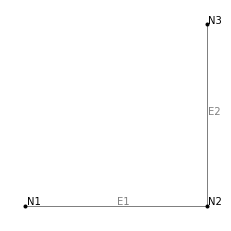

In [11]:
LBracket.PlotMesh(FontMag=2)

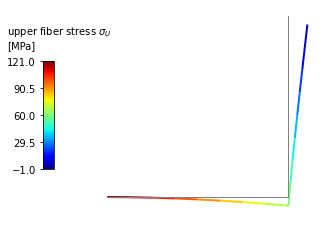

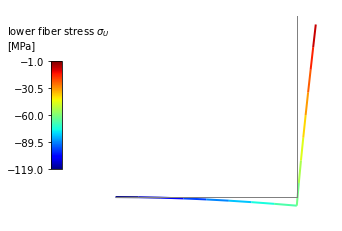

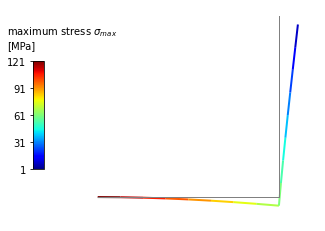

In [12]:
LBracket.PlotStress(stress="all")

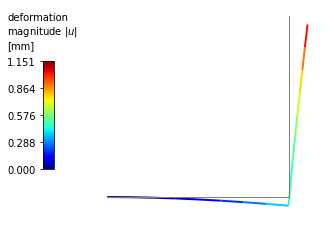

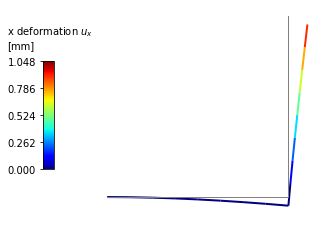

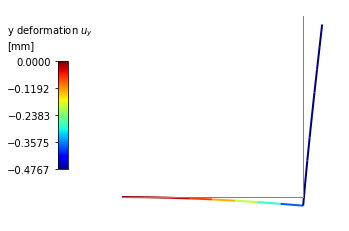

In [13]:
LBracket.PlotDisplacement()